Name: Konstantinos Perros
AEM: 3713

SVM testing and cross-validation on MNIST dataset as well as comparison with KNNs and Nearest Centroid.

In [1]:
from sklearn.datasets import load_iris
import numpy as np
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()



Standard libraries for use in the program

In [2]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import NearestCentroid

from sklearn.decomposition import PCA

from sklearn.svm import SVC

import matplotlib.pyplot as plt

import time

In [17]:
x_train_trans = x_train[:2000,:,:].reshape(2000,784)
y_train_trans = y_train[:2000]
x_test_trans = x_test[:1000,:,:].reshape(1000,784)
y_test_trans = y_train[:1000]


for i in range(len(y_train_trans)) :
  if y_train[i] % 2 == 0:
    y_train_trans[i] = 0
  else:
    y_train_trans[i] = 1

for i in range(len(y_test_trans)) :
  if y_test_trans[i] % 2 == 0:
    y_test_trans[i] = 0
  else:
    y_test_trans[i] = 1


restriction = [0.01, 0.1, 1, 10, 100, 1000]

We set the train set to 2000 items and the test to 1000 items. We also seperate by even and odd and aftewards run SVMs.

We will run all svms using different parameters for decision_function_shapes, kernels, C restrictions and other specifics.
We will leave the max iterations to 10 million since this is a sufficiently large pool for the samples given.

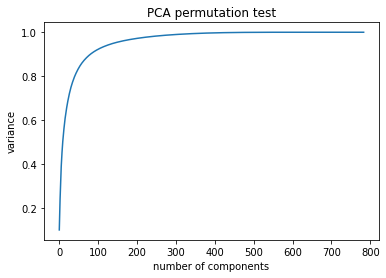

In [14]:
pca = PCA(svd_solver='randomized', whiten=True).fit(x_train_trans)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('variance')
plt.title("PCA permutation test")
plt.show() 

We will pass the train data through a PCA to reduce dimensionality while keeping the majority of the information (over 90%)

It should be noted that although we applied PCA to the data, the overall results do not change nearly at all after some offline tests taht will not be shown to not clutter the program, so we will not be applying PCA to the following experiments.

In [18]:
for B in ['ovo','ovr']:
  print(B,":\n")
  for C in restriction:
      start = time.time()
      svm = SVC(C=C, kernel = 'linear', decision_function_shape = B, max_iter=10000000)
      svm.fit(x_train_trans, y_train_trans)
      print("C = ", C, "Train, test acc: ", 100*svm.score(x_train_trans, y_train_trans), 100*svm.score(x_test_trans, y_test_trans), "\n")
      end = time.time()
      print("Time: ", end-start, "\n")
      #print(svm.support_vectors_.shape)


ovo :

C =  0.01 Train, test acc:  100.0 50.0 

Time:  4.118757247924805 

C =  0.1 Train, test acc:  100.0 50.0 

Time:  4.128528118133545 

C =  1 Train, test acc:  100.0 50.0 

Time:  4.042014837265015 

C =  10 Train, test acc:  100.0 50.0 

Time:  3.9956912994384766 

C =  100 Train, test acc:  100.0 50.0 

Time:  4.049081802368164 

C =  1000 Train, test acc:  100.0 50.0 

Time:  3.9970204830169678 

ovr :

C =  0.01 Train, test acc:  100.0 50.0 

Time:  3.9666941165924072 

C =  0.1 Train, test acc:  100.0 50.0 

Time:  3.916217088699341 

C =  1 Train, test acc:  100.0 50.0 

Time:  3.9672389030456543 

C =  10 Train, test acc:  100.0 50.0 

Time:  3.9452240467071533 

C =  100 Train, test acc:  100.0 50.0 

Time:  3.9802725315093994 

C =  1000 Train, test acc:  100.0 50.0 

Time:  3.9319326877593994 



On linear kernels we gain pretty quickly perfect results on train data, however we observe that the test results remain unchanged at 50% between all decision shape funstions and restrictions.

In [6]:
for B in ['ovo','ovr']:
  print(B,":\n")
  for C in restriction:
    for gamma in restriction:
      start = time.time()
      svm = SVC(C=C, gamma = gamma, decision_function_shape = B, max_iter=1000000)
      svm.fit(x_train_trans, y_train_trans)
      print("C = ", C, "Gamma = ", gamma, "Train, test acc: ", 100*svm.score(x_train_trans, y_train_trans), 100*svm.score(x_test_trans, y_test_trans), "\n")
      end = time.time()
      print("Time: ", end-start, "\n")

ovo :

C =  0.01 Gamma =  0.01 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  6.12264084815979 

C =  0.01 Gamma =  0.1 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  5.594053268432617 

C =  0.01 Gamma =  1 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  5.6972291469573975 

C =  0.01 Gamma =  10 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  5.749453544616699 

C =  0.01 Gamma =  100 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  5.76353907585144 

C =  0.01 Gamma =  1000 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  5.678483247756958 

C =  0.1 Gamma =  0.01 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  5.668518304824829 

C =  0.1 Gamma =  0.1 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  5.8096230030059814 

C =  0.1 Gamma =  1 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  5.845764636993408 

C =  0.1 Gamma =  10 Train, test ac

In a gamma SVM, it's clear we get the best possible results with a C of 1 or above without any significant change between the gamma or decision function shapes. We get perfect results on the train data but mediocre on test data. Overall the gamma is slower than the linear svm but slightly more accurate in high restrictions.

In [10]:
for B in ['ovr','ovo']:
  print(B,":\n")
  for C in restriction:
    for A in [0, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50]:
      start = time.time()
      svm = SVC(C=C, kernel = 'poly', degree = A, decision_function_shape = B, max_iter=1000000)
      svm.fit(x_train_trans, y_train_trans)
      print("C = ", C, "Degree = ", A, "Train, test acc: ", 100*svm.score(x_train_trans, y_train_trans), 100*svm.score(x_test_trans, y_test_trans), "\n")
      end = time.time()
      print("Time: ", end-start, "\n")

ovr :

C =  0.01 Degree =  0 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  3.6525800228118896 

C =  0.01 Degree =  1 Train, test acc:  77.9 53.0 

Time:  3.37712025642395 

C =  0.01 Degree =  2 Train, test acc:  73.4 52.400000000000006 

Time:  3.41560959815979 

C =  0.01 Degree =  3 Train, test acc:  69.3 53.5 

Time:  3.1100707054138184 

C =  0.01 Degree =  4 Train, test acc:  67.65 53.2 

Time:  2.8576083183288574 

C =  0.01 Degree =  5 Train, test acc:  67.05 52.7 

Time:  2.718003511428833 

C =  0.01 Degree =  10 Train, test acc:  69.05 53.1 

Time:  2.753957509994507 

C =  0.01 Degree =  20 Train, test acc:  76.8 52.900000000000006 

Time:  3.129990816116333 

C =  0.01 Degree =  30 Train, test acc:  80.60000000000001 51.9 

Time:  3.01537823677063 

C =  0.01 Degree =  40 Train, test acc:  82.8 51.5 

Time:  2.9183907508850098 

C =  0.01 Degree =  50 Train, test acc:  83.8 51.7 

Time:  3.1950697898864746 

C =  0.1 Degree =  0 Train, test acc:  51.2499

For the polynomial kernel, as previously, we get pretty good results on higher C restrictions on train samples, but generally mediocre results on tests. Regardless, we can observe that middle polynomial degrees, in the range of 20 gain pretty good results on tests in comparison to other degrees, and the although the one vs rest function shape gets better results on tests, the one vs one function is simply faster and gains better results on train samples. We easily identify as such that a C restriction of 1000 with a degree of 20 yields the best results.

In [19]:
for B in ['ovr','ovo']:
  print(B,":\n")
  for A in [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]:
    start = time.time()
    svm = SVC(C=1000, kernel = 'poly', degree = A, decision_function_shape = B, max_iter=1000000)
    svm.fit(x_train_trans, y_train_trans)
    print("C = ", C, "Degree = ", A, "Train, test acc: ", 100*svm.score(x_train_trans, y_train_trans), 100*svm.score(x_test_trans, y_test_trans), "\n")
    end = time.time()
    print("Time: ", end-start, "\n")

ovr :

C =  1000 Degree =  20 Train, test acc:  97.0 54.400000000000006 

Time:  2.5977227687835693 

C =  1000 Degree =  21 Train, test acc:  96.65 54.400000000000006 

Time:  2.691044807434082 

C =  1000 Degree =  22 Train, test acc:  96.15 54.6 

Time:  2.687039852142334 

C =  1000 Degree =  23 Train, test acc:  95.75 54.7 

Time:  2.6491806507110596 

C =  1000 Degree =  24 Train, test acc:  95.25 54.0 

Time:  2.640491247177124 

C =  1000 Degree =  25 Train, test acc:  95.0 53.7 

Time:  2.7116541862487793 

C =  1000 Degree =  26 Train, test acc:  94.69999999999999 53.6 

Time:  2.7439112663269043 

C =  1000 Degree =  27 Train, test acc:  94.45 53.300000000000004 

Time:  2.824190616607666 

C =  1000 Degree =  28 Train, test acc:  94.1 53.2 

Time:  2.7705280780792236 

C =  1000 Degree =  29 Train, test acc:  93.89999999999999 53.1 

Time:  2.9138333797454834 

C =  1000 Degree =  30 Train, test acc:  93.75 52.800000000000004 

Time:  2.9272539615631104 

ovo :

C =  1000 D

We will rerun a polynomial kernel svm this time with a restriction of C=1000 and a range of degrees between 20 and 30 to find the best degree for the best results.

It is evident that the best results are yielded for a degree of 23 in both decision function shape cases, making obvious that higher degrees cause overfitting.

In [13]:
for B in ['ovr','ovo']:
  print(B,":\n")
  for C in restriction:
    for gamma in restriction:
      start = time.time()
      svm = SVC(C=C, kernel = 'rbf', gamma = gamma, decision_function_shape = B, max_iter=1000000)
      svm.fit(x_train_trans, y_train_trans)
      print("C = ", C, "Gamma = ", gamma, "Train, test acc: ", 100*svm.score(x_train_trans, y_train_trans), 100*svm.score(x_test_trans, y_test_trans), "\n")
      end = time.time()
      print("Time: ", end-start, "\n")

ovr :

C =  0.01 Gamma =  0.01 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  7.117146730422974 

C =  0.01 Gamma =  0.1 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  6.7164881229400635 

C =  0.01 Gamma =  1 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  8.872718572616577 

C =  0.01 Gamma =  10 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  6.079957008361816 

C =  0.01 Gamma =  100 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  6.081526279449463 

C =  0.01 Gamma =  1000 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  5.904083013534546 

C =  0.1 Gamma =  0.01 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  5.831531763076782 

C =  0.1 Gamma =  0.1 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  5.4942591190338135 

C =  0.1 Gamma =  1 Train, test acc:  51.24999999999999 51.800000000000004 

Time:  5.889695405960083 

C =  0.1 Gamma =  10 Train, test 

In the radial basis function kernel we run for an equal amount of gammas as the gamma kernel and we observe pretty standard results. The train data accuracy is better when the restriction C is at 1 or above and after that no matter the gamma or decision function shape change we do not observe significant changes in test results. However it should be pointed that one vs one is faster.

In [20]:
for B in ['ovr','ovo']:
  print(B,":\n")
  for C in restriction:
      start = time.time()
      svm = SVC(C=C, kernel = 'sigmoid', decision_function_shape = B, max_iter=1000000)
      svm.fit(x_train_trans, y_train_trans)
      print("C = ", C, "Train, test acc: ", 100*svm.score(x_train_trans, y_train_trans), 100*svm.score(x_test_trans, y_test_trans), "\n")
      end = time.time()
      print("Time: ", end-start, "\n")

ovr :

C =  0.01 Train, test acc:  74.75 53.0 

Time:  4.513489007949829 

C =  0.1 Train, test acc:  81.69999999999999 52.2 

Time:  2.4849870204925537 

C =  1 Train, test acc:  73.85000000000001 51.300000000000004 

Time:  1.5451467037200928 

C =  10 Train, test acc:  70.35 51.7 

Time:  2.551572322845459 

C =  100 Train, test acc:  70.65 51.0 

Time:  1.6528229713439941 

C =  1000 Train, test acc:  70.7 51.0 

Time:  1.1896510124206543 

ovo :

C =  0.01 Train, test acc:  74.75 53.0 

Time:  4.094280958175659 

C =  0.1 Train, test acc:  81.69999999999999 52.2 

Time:  2.4172492027282715 

C =  1 Train, test acc:  73.85000000000001 51.300000000000004 

Time:  1.6320199966430664 

C =  10 Train, test acc:  70.35 51.7 

Time:  1.281337022781372 

C =  100 Train, test acc:  70.65 51.0 

Time:  1.2088346481323242 

C =  1000 Train, test acc:  70.7 51.0 

Time:  1.3417835235595703 



We observe something interesting on the sigmoid kernel svm. The results are actually better for the lowest restriction C = 0.01 for the test data. Also, no significant change can be observed between the decision function shapes, however, it should be noted that one vs one is still faster.

In [21]:
x_train_trans = x_train[:2500,:,:].reshape(2500,784)
y_train_trans = y_train[:2500]
x_test_trans = x_test[:1000,:,:].reshape(1000,784)
y_test_trans = y_train[:1000]


for i in range(len(y_train_trans)) :
  if y_train[i] % 2 == 0:
    y_train_trans[i] = 0
  else:
    y_train_trans[i] = 1

for i in range(len(y_test_trans)) :
  if y_test_trans[i] % 2 == 0:
    y_test_trans[i] = 0
  else:
    y_test_trans[i] = 1

We will experiment with a little bit larger pool of train data, namely 2500 instead of 2000. We won't increase the size too much as the time taken significantly rises

In [22]:
for B in ['ovo','ovr']:
  print(B,":\n")
  for C in restriction:
      start = time.time()
      svm = SVC(C=C, kernel = 'linear', decision_function_shape = B, max_iter=10000000)
      svm.fit(x_train_trans, y_train_trans)
      print("C = ", C, "Train, test acc: ", 100*svm.score(x_train_trans, y_train_trans), 100*svm.score(x_test_trans, y_test_trans), "\n")
      end = time.time()
      print("Time: ", end-start, "\n")
      #print(svm.support_vectors_.shape)


ovo :



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C =  0.01 Train, test acc:  99.56 51.1 

Time:  67.76579284667969 



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C =  0.1 Train, test acc:  100.0 50.4 

Time:  75.47260212898254 



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C =  1 Train, test acc:  100.0 50.4 

Time:  74.73250150680542 



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C =  10 Train, test acc:  100.0 50.4 

Time:  77.08259582519531 



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C =  100 Train, test acc:  100.0 50.4 

Time:  64.28415608406067 



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C =  1000 Train, test acc:  100.0 50.4 

Time:  67.63238048553467 

ovr :



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C =  0.01 Train, test acc:  99.56 51.1 

Time:  61.260311126708984 



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C =  0.1 Train, test acc:  100.0 50.4 

Time:  80.57113695144653 



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C =  1 Train, test acc:  100.0 50.4 

Time:  71.26330709457397 



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C =  10 Train, test acc:  100.0 50.4 

Time:  56.95693230628967 



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C =  100 Train, test acc:  100.0 50.4 

Time:  57.31477499008179 



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C =  1000 Train, test acc:  100.0 50.4 

Time:  61.011377811431885 



Immediately evident is the fact that now every iteration takes 10 times longer to complete with just 25% more samples. In fact, we reach the maximum number of iteration before a satisfactory result for the svm can be reached. However, the test results on accuracy are an iota better for all C restrictions. It is clear that higher maximum iterations as well as train data size yields minorly better results at a major time cost. We can even experiment on larger sample data to prove this point regardless of kernel.

In [24]:
x_train_trans = x_train[:2500,:,:].reshape(2500,784)
y_train_trans = y_train[:2500]
x_test_trans = x_test[:1000,:,:].reshape(1000,784)
y_test_trans = y_train[:1000]
pca = PCA(svd_solver='randomized', whiten=True).fit(x_train_trans)

for i in range(len(y_train_trans)) :
  if y_train[i] % 2 == 0:
    y_train_trans[i] = 0
  else:
    y_train_trans[i] = 1

for i in range(len(y_test_trans)) :
  if y_test_trans[i] % 2 == 0:
    y_test_trans[i] = 0
  else:
    y_test_trans[i] = 1

start = time.time()
svm = SVC(C=1000, kernel = 'linear', decision_function_shape = 'ovo', max_iter=1000000000)
svm.fit(x_train_trans, y_train_trans)
print("C = ", 1000, "Train, test acc: ", 100*svm.score(x_train_trans, y_train_trans), 100*svm.score(x_test_trans, y_test_trans), "\n")
end = time.time()
print("Time: ", end-start, "\n")
#print(svm.support_vectors_.shape)

C =  0.1 Train, test acc:  100.0 50.5 

Time:  90.91044569015503 



We will even try to increase the maximum iterations on the best parameters on linear (C = 1000 and one vs one shape function) to identify if the results are better when the svm is satisfied (at 1 billion iterations).
The results are minorly better (about 0.1%) and the time taken has increased by 50% compared to previously.

Below are some experimental results using the entire pool of train and test samples. We only test for C = 0.1 and C = 1 and we easily observe that the time taken has increased exponentially even though we took 100 times less max iterations. Since the time increases radically and the test results are still not really much better than mediocrity, we can conclude that overall SVMs are generally bad at classifying images.

Code has been omitted for redundancy and crashes due to long runtimes.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000). Consider pre-processing your data with StandardScaler or MinMaxScaler. warnings.warn( C = 0.1 Train, test acc: 65.71666666666667 64.68 Time: 6729.136845827103

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000). Consider pre-processing your data with StandardScaler or MinMaxScaler. warnings.warn( C = 1 Train, test acc: 65.71666666666667 64.68 Time: 6737.660354137421

Below we will compare results with standard KNNs and Nearest Centroid.

In [25]:
x_train_trans = x_train[:2500,:,:].reshape(2500,784)
y_train_trans = y_train[:2500]
x_test_trans = x_test[:1000,:,:].reshape(1000,784)
y_test_trans = y_train[:1000]

In [32]:
knn1 = KNeighborsClassifier(n_neighbors=1)
start = time.time()
knn1.fit(x_train_trans, y_train_trans)
print("Test accuracy = ", knn1.score(x_test_trans,y_test_trans))
end = time.time()
print("Time: ", end-start, "\n")

Test accuracy =  0.494
Time:  0.5929880142211914 



In [33]:
knn3 = KNeighborsClassifier(n_neighbors=3)
start = time.time()
knn3.fit(x_train_trans, y_train_trans)
print("Test accuracy = ", knn3.score(x_test_trans,y_test_trans))
end = time.time()
print("Time: ", end-start, "\n")

Test accuracy =  0.487
Time:  0.6621124744415283 



In [34]:
ctr = NearestCentroid()
start = time.time()
ctr.fit(x_train_trans, y_train_trans)
NearestCentroid()
print("Test accuracy = ", ctr.score(x_test_trans,y_test_trans))
end = time.time()
print("Time: ", end-start, "\n")

Test accuracy =  0.52
Time:  0.015990495681762695 



In comparison, we can observe, as with the previous results of the 1st project, that nearest neighbour and nearest centroid take a fraction of the time to complete, however, yield a bit worse test results. That occurs due to the small sample size for training. 

Observable is the fact that Nearest Centroid is really fast, with no other algorithm so far able to compare, while yielding better results than 90% of the experiments so far, albeit not better than the best results that SVMs can offer so far (namely: 54.7 for polynomial kernel with restriction C = 1000 and polynomial degree = 23)

As evident however by the previous results, SVMs don't scale well and on high sample sizes take way more time to complete to yield generally mediocre results, whereas KNNs and Nearest Centroid have proven from the 1st prject that can yield pretty good results with enough train samples.